In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt

# Fundamental Building Blocks

Based on the ideas presented by Cleveland, Ware, and the Gestalt Principles of Visual perception, we're going start talking about the types of charts we want to build and the types of customizations we would entertain, in order to take advantage of these principles (or not violate them).

For Stephen Few, this limits our basic elements to just four (4!):

1. Points
2. Lines
3. Bars
4. Boxes

That's it at least in terms of *quantitative* encoding. For now, we will ignore boxes so that really leaves us points, lines and bars and some combinations.

## Points

From a `matplotlib` point of view, these do not map exactly onto the functions available. For example, using points for *categorical* data is different than using points for *numerical* data. Additionally, you have to do things differently if you want your chart to be horizontal or vertical.

Here's a categorical chart that uses points, *Dot Chart*. A Dot Chart is preferrable to a Bar Chart when you do not wish to include 0 in the y axis. The dotted lines are visual guidelines, especially in horizontal versions, they will go all the way through like gridlines. Both versions are provided here.

Once you understand how `matplotlib` works, you will see that I have essentially used the regular `plot` function and made up fake x-axis data and gave it categorical labels.

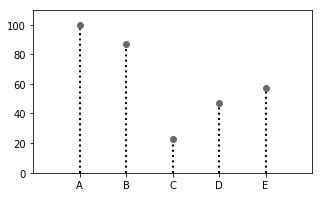

In [3]:
figure = plt.figure(figsize=(5, 3))

xs = [1, 2, 3, 4, 5]
data = [100, 87, 23, 47, 57]

axes = figure.add_subplot(1, 1, 1)
axes.plot(xs, data, "o", color="dimgray")
axes.vlines(xs, [0], data, linestyles='dotted', lw=2)
axes.set_xticks(xs)
axes.set_xlim((0, 6))
axes.set_ylim((0, 110))
axes.set_xticklabels(["A", "B", "C", "D", "E"])
axes.xaxis.grid(False)

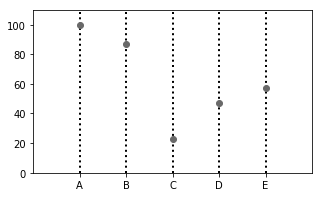

In [4]:
figure = plt.figure(figsize=(5, 3))

xs = [1, 2, 3, 4, 5]
data = [100, 87, 23, 47, 57]

axes = figure.add_subplot(1, 1, 1)
axes.plot(xs, data, "o", color="dimgray")
axes.vlines(xs, [0], [110], linestyles='dotted', lw=2)
axes.set_xticks(xs)
axes.set_xlim((0, 6))
axes.set_ylim((0, 110))
axes.set_xticklabels(["A", "B", "C", "D", "E"])
axes.xaxis.grid(False)

To use points with numerical data only, we use the same command `plot` and create a *Scatter Plot* or *XY-Plot*.

(10, 110)

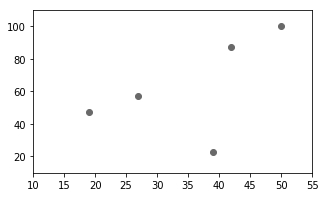

In [5]:
figure = plt.figure(figsize=(5, 3))

xs = [50, 42, 39, 19, 27]
ys = [100, 87, 23, 47, 57]

axes = figure.add_subplot(1, 1, 1)
axes.plot(xs, ys, "o", color="dimgray")
axes.set_xlim((10, 55))
axes.set_ylim((10, 110))

Notice that there's no specific reason to start at 0 on the x or y scale.

## Lines

Unless these points follow each other, we should not connect them with lines. If, however, these were readings of two variables that occurred in time, we might connect the points with lines. Note that this uses the Gestalt Principle of Connection...if there is no connection, don't use lines!

[Text(0,0,'A'), Text(0,0,'B'), Text(0,0,'C'), Text(0,0,'D'), Text(0,0,'E')]

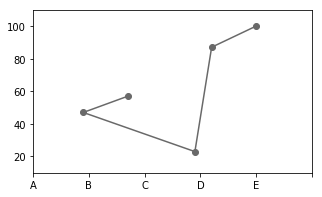

In [6]:
figure = plt.figure(figsize=(5, 3))

xs = [50, 42, 39, 19, 27]
ys = [100, 87, 23, 47, 57]

axes = figure.add_subplot(1, 1, 1)
axes.plot(xs, ys, "o-", color="dimgray")
axes.set_xlim((10,60))
axes.set_ylim((10, 110))
axes.set_xticklabels(["A", "B", "C", "D", "E"])


A single value that is recorded over time is often shown with either just line, points or both. There can be various reasons for each. Just a line is often used where the implication that the numerical measurement is *continuous*. Just points are often used when there are breaks in the measurement (for example, no values for weekends). Points and lines can be used together when we want to emphasize both the continuity and the specific values, especially if we are plotting multiple lines.


Note that for `matplotlib`'s purposes, time is categorical. You may need to create an index or use the actual millis on the x-axis and create tick labels for them.

[Text(0,0,'Jan'),
 Text(0,0,'Feb'),
 Text(0,0,'Mar'),
 Text(0,0,'Apr'),
 Text(0,0,'May')]

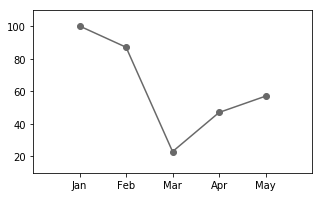

In [7]:
figure = plt.figure(figsize=(5, 3))

xs = [1, 2, 3, 4, 5]
ys = [100, 87, 23, 47, 57]

axes = figure.add_subplot(1, 1, 1)
axes.plot(xs, ys, "o-", color="dimgray")
axes.set_xlim((0, 6))
axes.set_ylim((10, 110))
axes.set_xticks(xs)
axes.set_xticklabels(["Jan", "Feb", "Mar", "Apr", "May"])

Notice how the Gestalt Principle of Closure describes how your perception projects the line out to June.

### Bars

We've already done Bars. We will reproduce the chart from above.

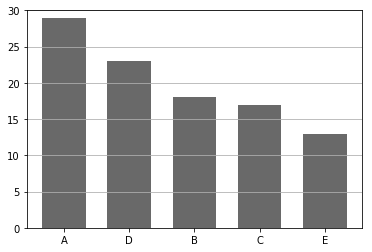

In [8]:
sales = [29, 23, 18, 17, 13]
width = 1/1.5
x = range( len( sales))

figure, axes = plt.subplots()

axes.bar(x, sales, width, color="dimgray", align="center")
axes.set_xticks([0, 1, 2, 3, 4])
axes.set_xticklabels(["A", "D", "B", "C", "E"])
axes.yaxis.grid( b=True, which="major")
axes.set_ylim((0, 30))

plt.show()

So those are the basic chart types. Which one you use, and what secondary changes you make (labels, color, "small multiples") depends on what you're trying to accomplish. Additionally, there will be times when you need to use specialized charts (for example, we'll see a "box-and-whiskers plot" soon) but you should always start with these.

## Multiple Data Series

The Playfair Trade Balance chart is an example of a chart with multiple data series (they don't always have to be time related). The two series are exports and imports (and we could derive a 3rd which would be the trade balance). As another example, we can have sales and expenditures for our ten business units.

We can also have data series for different things at different points in time. For example, monthly unemployment rates by state over the last 60 months.

So far our charts have shown a single data series. How do we deal with multiple data series? This largely depends on the base chart (line, bar, dots) and exactly how many series we have...two or 50?

Here's a typical line plot with three data series:

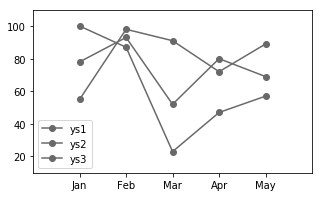

In [9]:
figure = plt.figure(figsize=(5, 3))

xs = [1, 2, 3, 4, 5]
ys1 = [100, 87, 23, 47, 57]
ys2 = [55, 98, 91, 72, 89]
ys3 = [78, 93, 52, 80, 69]

axes = figure.add_subplot(1, 1, 1)
axes.plot(xs, ys1, "o-", color="dimgray", label="ys1")
axes.plot(xs, ys2, "o-", color="dimgray", label="ys2")
axes.plot(xs, ys3, "o-", color="dimgray", label="ys3")
axes.set_xlim((0, 6))
axes.set_ylim((10, 110))
axes.set_xticks(xs)
axes.set_xticklabels(["Jan", "Feb", "Mar", "Apr", "May"])
axes.legend()

plt.show()
plt.close()

Of course, we can't tell which one is which. We haven't talked about *color* yet but we can use different markers for the lines:

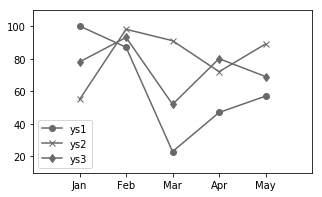

In [10]:
figure = plt.figure(figsize=(5, 3))

xs = [1, 2, 3, 4, 5]
ys1 = [100, 87, 23, 47, 57]
ys2 = [55, 98, 91, 72, 89]
ys3 = [78, 93, 52, 80, 69]

axes = figure.add_subplot(1, 1, 1)
axes.plot(xs, ys1, "o-", color="dimgray", label="ys1")
axes.plot(xs, ys2, "x-", color="dimgray", label="ys2")
axes.plot(xs, ys3, "d-", color="dimgray", label="ys3")
axes.set_xlim((0, 6))
axes.set_ylim((10, 110))
axes.set_xticks(xs)
axes.set_xticklabels(["Jan", "Feb", "Mar", "Apr", "May"])
axes.legend()

plt.show()
plt.close()

This is still pretty difficult to decode. We have to keep looking at the legend and the points and then back. One of the easier solutions is small multiples...at least once you learn how to get multiple charts in a single plot area.

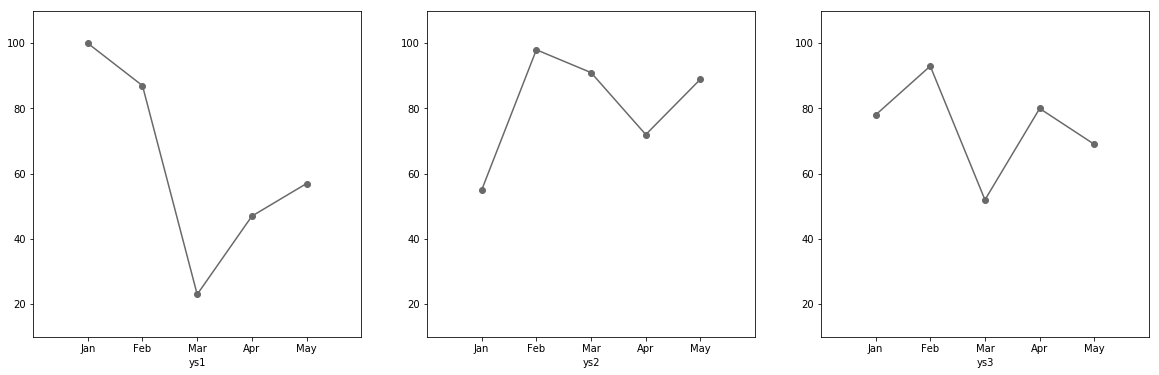

In [11]:
figure = plt.figure(figsize=(20, 6))

xs = [1, 2, 3, 4, 5]
ys1 = [100, 87, 23, 47, 57]
ys2 = [55, 98, 91, 72, 89]
ys3 = [78, 93, 52, 80, 69]

axes = figure.add_subplot(1, 3, 1)
axes.plot(xs, ys1, "o-", color="dimgray", label="ys1")
axes.set_xlim((0, 6))
axes.set_ylim((10, 110))
axes.set_xticks(xs)
axes.set_xticklabels(["Jan", "Feb", "Mar", "Apr", "May"])
axes.set_xlabel("ys1")

axes = figure.add_subplot(1, 3, 2)
axes.plot(xs, ys2, "o-", color="dimgray", label="ys2")
axes.set_xlim((0, 6))
axes.set_ylim((10, 110))
axes.set_xticks(xs)
axes.set_xticklabels(["Jan", "Feb", "Mar", "Apr", "May"])
axes.set_xlabel("ys2")

axes = figure.add_subplot(1, 3, 3)
axes.plot(xs, ys3, "o-", color="dimgray", label="ys3")
axes.set_xlim((0, 6))
axes.set_ylim((10, 110))
axes.set_xticks(xs)
axes.set_xticklabels(["Jan", "Feb", "Mar", "Apr", "May"])
axes.set_xlabel("ys3")

plt.show()
plt.close()

Amazingly, it's fairly effortless to detect differences in the series. We can also arrange them vertically if we think that'll make for a better comparison:

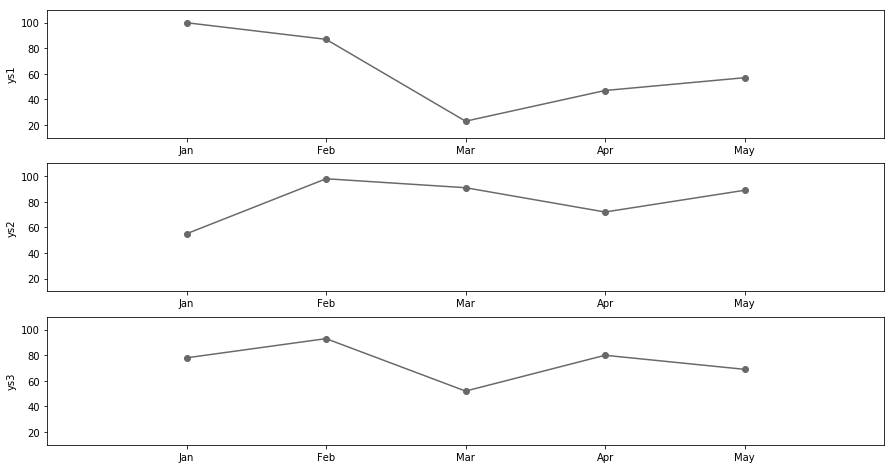

In [12]:
figure = plt.figure(figsize=(15, 8))

xs = [1, 2, 3, 4, 5]
ys1 = [100, 87, 23, 47, 57]
ys2 = [55, 98, 91, 72, 89]
ys3 = [78, 93, 52, 80, 69]

axes = figure.add_subplot(3, 1, 1)
axes.plot(xs, ys1, "o-", color="dimgray", label="ys1")
axes.set_xlim((0, 6))
axes.set_ylim((10, 110))
axes.set_xticks(xs)
axes.set_xticklabels(["Jan", "Feb", "Mar", "Apr", "May"])
axes.set_ylabel("ys1")

axes = figure.add_subplot(3, 1, 2)
axes.plot(xs, ys2, "o-", color="dimgray", label="ys2")
axes.set_xlim((0, 6))
axes.set_ylim((10, 110))
axes.set_xticks(xs)
axes.set_xticklabels(["Jan", "Feb", "Mar", "Apr", "May"])
axes.set_ylabel("ys2")

axes = figure.add_subplot(3, 1, 3)
axes.plot(xs, ys3, "o-", color="dimgray", label="ys3")
axes.set_xlim((0, 6))
axes.set_ylim((10, 110))
axes.set_xticks(xs)
axes.set_xticklabels(["Jan", "Feb", "Mar", "Apr", "May"])
axes.set_ylabel("ys3")

plt.show()
plt.close()

This works for bar charts as well although if you only have two series for a bar chart, there is an alternative.